ЛАБОРАТОРНАЯ РАБОТА №4 Шелонин Никита Максимович БИВТ-22-СП-5

## 1. Пример импорта данных. Грузим данные

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import numpy as np

In [2]:
file_path = r'data.csv'
data = pd.read_csv(file_path)

## 2. Понимаем, какая перед нами задача

In [3]:
print("Образец данных:")
print(data.head())

Образец данных:
        EducationSector IndividualProject  Age Gender City Influenced  \
0  Engineering Sciences                No   19   Male  Yes         No   
1  Engineering Sciences               Yes   22   Male   No        Yes   
2  Engineering Sciences                No   18   Male  Yes         No   
3  Engineering Sciences               Yes   20   Male  Yes        Yes   
4  Engineering Sciences               Yes   19   Male  Yes        Yes   

   Perseverance  DesireToTakeInitiative  Competitiveness  SelfReliance  \
0             2                       2                3             3   
1             3                       3                3             4   
2             3                       4                3             3   
3             3                       3                3             3   
4             2                       3                3             3   

   StrongNeedToAchieve  SelfConfidence  GoodPhysicalHealth MentalDisorder  \
0                    2 

In [4]:
data.isnull().sum()

,0
EducationSector,0
IndividualProject,0
Age,0
Gender,0
City,0
Influenced,0
Perseverance,0
DesireToTakeInitiative,0
Competitiveness,0
SelfReliance,0


In [5]:
data.drop(columns=['ReasonsForLack'], inplace=True)

## 3. Делаем предобработку данных

In [6]:
# Кодировка целевой переменной
label_encoder = LabelEncoder()
data['Adaptivity Level'] = label_encoder.fit_transform(data['y'])

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['y'])
y = data['y']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Определение категориальных и числовых столбцов
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# OneHotEncoder для категориальных данных
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_categorical = ohe.fit_transform(X_train[categorical_columns])
X_test_categorical = ohe.transform(X_test[categorical_columns])

# StandardScaler для числовых данных (если есть)
scaler = StandardScaler()
if len(numerical_columns) > 0:
    X_train_numerical = scaler.fit_transform(X_train[numerical_columns])
    X_test_numerical = scaler.transform(X_test[numerical_columns])
else:
    X_train_numerical = np.array([]).reshape(X_train_categorical.shape[0], 0)
    X_test_numerical = np.array([]).reshape(X_test_categorical.shape[0], 0)

# Объединение обработанных данных
X_train_processed = np.hstack([X_train_categorical, X_train_numerical])
X_test_processed = np.hstack([X_test_categorical, X_test_numerical])

# Вывод размеров обработанных данных
print(f"Размеры тренировочной выборки: {X_train_processed.shape}, Тестовой выборки: {X_test_processed.shape}")

Размеры тренировочной выборки: (175, 33), Тестовой выборки: (44, 33)


# 4. Оформить данные в виде класса Dataset из библиотеки torch (как мы это делали на семинаре), а затем засунуть в Dataloader (тоже делали на семинаре).

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader

# Определение класса Dataset
class AdaptivityDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Создание объектов Dataset
train_dataset = AdaptivityDataset(X_train_processed, y_train)
test_dataset = AdaptivityDataset(X_test_processed, y_test)

# Создание DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 5. Создание и обучение простой однослойной нейронной сети

Epoch 1/20, Train Loss: 0.8166, Test Loss: 0.8070
Epoch 2/20, Train Loss: 0.7635, Test Loss: 0.7667
Epoch 3/20, Train Loss: 0.7246, Test Loss: 0.7298
Epoch 4/20, Train Loss: 0.6956, Test Loss: 0.6927
Epoch 5/20, Train Loss: 0.6601, Test Loss: 0.6600
Epoch 6/20, Train Loss: 0.6391, Test Loss: 0.6289
Epoch 7/20, Train Loss: 0.6044, Test Loss: 0.6011
Epoch 8/20, Train Loss: 0.5848, Test Loss: 0.5762
Epoch 9/20, Train Loss: 0.5577, Test Loss: 0.5528
Epoch 10/20, Train Loss: 0.5341, Test Loss: 0.5308
Epoch 11/20, Train Loss: 0.5154, Test Loss: 0.5105
Epoch 12/20, Train Loss: 0.4984, Test Loss: 0.4913
Epoch 13/20, Train Loss: 0.4782, Test Loss: 0.4735
Epoch 14/20, Train Loss: 0.4613, Test Loss: 0.4573
Epoch 15/20, Train Loss: 0.4439, Test Loss: 0.4405
Epoch 16/20, Train Loss: 0.4312, Test Loss: 0.4259
Epoch 17/20, Train Loss: 0.4188, Test Loss: 0.4112
Epoch 18/20, Train Loss: 0.4029, Test Loss: 0.3983
Epoch 19/20, Train Loss: 0.3869, Test Loss: 0.3857
Epoch 20/20, Train Loss: 0.3743, Test Lo

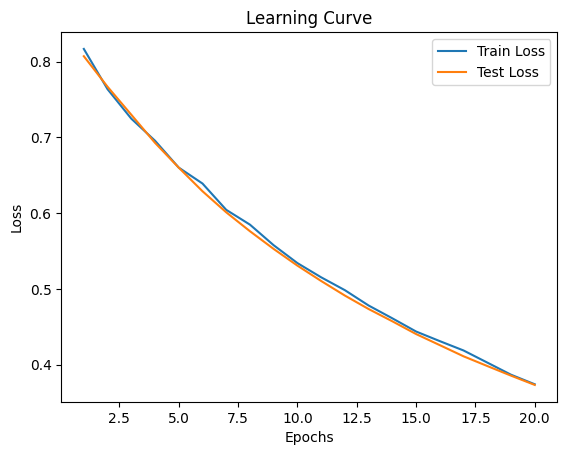

In [8]:

import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Однослойная нейросеть
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

# Определение гиперпараметров
input_size = X_train_processed.shape[1]  # Количество признаков
output_size = len(label_encoder.classes_)  # Количество классов
learning_rate = 0.01
num_epochs = 20

# Инициализация модели, функции потерь и оптимизатора
model = SimpleNN(input_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Списки для хранения значений потерь
train_losses = []
test_losses = []

# Функция для вычисления потерь
def compute_loss(dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for features, labels in dataloader:
            outputs = model(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Обучение модели
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))
    test_losses.append(compute_loss(test_loader))

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

# Построение кривой обучения
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# 6.  Создание и обучение более сложной модели с одним скрытым слоем

Epoch 1/20, Train Loss: 0.6486, Test Loss: 0.6335
Epoch 2/20, Train Loss: 0.6074, Test Loss: 0.6046
Epoch 3/20, Train Loss: 0.5854, Test Loss: 0.5758
Epoch 4/20, Train Loss: 0.5481, Test Loss: 0.5469
Epoch 5/20, Train Loss: 0.5195, Test Loss: 0.5152
Epoch 6/20, Train Loss: 0.4832, Test Loss: 0.4834
Epoch 7/20, Train Loss: 0.4424, Test Loss: 0.4480
Epoch 8/20, Train Loss: 0.4107, Test Loss: 0.4105
Epoch 9/20, Train Loss: 0.3731, Test Loss: 0.3730
Epoch 10/20, Train Loss: 0.3363, Test Loss: 0.3362
Epoch 11/20, Train Loss: 0.3024, Test Loss: 0.3004
Epoch 12/20, Train Loss: 0.2690, Test Loss: 0.2669
Epoch 13/20, Train Loss: 0.2355, Test Loss: 0.2341
Epoch 14/20, Train Loss: 0.2070, Test Loss: 0.2048
Epoch 15/20, Train Loss: 0.1816, Test Loss: 0.1782
Epoch 16/20, Train Loss: 0.1575, Test Loss: 0.1559
Epoch 17/20, Train Loss: 0.1353, Test Loss: 0.1368
Epoch 18/20, Train Loss: 0.1174, Test Loss: 0.1195
Epoch 19/20, Train Loss: 0.1031, Test Loss: 0.1048
Epoch 20/20, Train Loss: 0.0897, Test Lo

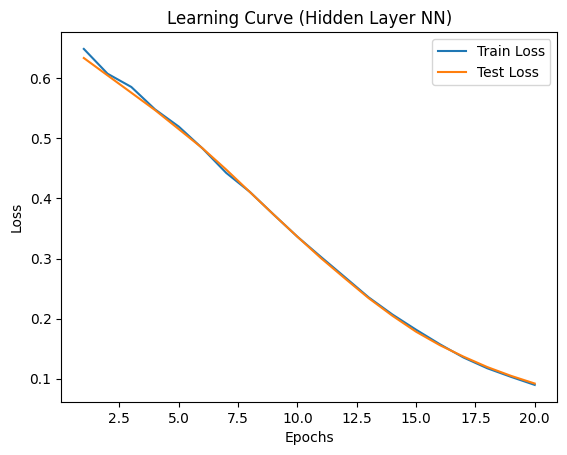

In [9]:

# Нейросеть с одним скрытым слоем
class HiddenLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(HiddenLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Определение гиперпараметров для новой модели
hidden_size = 64  # Размер скрытого слоя
learning_rate = 0.001
num_epochs = 20

# Инициализация модели, функции потерь и оптимизатора
model = HiddenLayerNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Списки для хранения значений потерь
train_losses = []
test_losses = []

# Обучение модели с одним скрытым слоем
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))
    test_losses.append(compute_loss(test_loader))

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

# Построение кривой обучения
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve (Hidden Layer NN)")
plt.legend()
plt.show()

# 7. Создание и обучение более сложной модели с 3+ скрытыми слоями

Epoch 1/20, Train Loss: 0.6930, Test Loss: 0.6639
Epoch 2/20, Train Loss: 0.6548, Test Loss: 0.6183
Epoch 3/20, Train Loss: 0.6001, Test Loss: 0.5466
Epoch 4/20, Train Loss: 0.5109, Test Loss: 0.4394
Epoch 5/20, Train Loss: 0.3888, Test Loss: 0.3017
Epoch 6/20, Train Loss: 0.2401, Test Loss: 0.1645
Epoch 7/20, Train Loss: 0.1144, Test Loss: 0.0707
Epoch 8/20, Train Loss: 0.0438, Test Loss: 0.0277
Epoch 9/20, Train Loss: 0.0157, Test Loss: 0.0116
Epoch 10/20, Train Loss: 0.0063, Test Loss: 0.0057
Epoch 11/20, Train Loss: 0.0032, Test Loss: 0.0035
Epoch 12/20, Train Loss: 0.0020, Test Loss: 0.0025
Epoch 13/20, Train Loss: 0.0014, Test Loss: 0.0020
Epoch 14/20, Train Loss: 0.0011, Test Loss: 0.0017
Epoch 15/20, Train Loss: 0.0009, Test Loss: 0.0015
Epoch 16/20, Train Loss: 0.0008, Test Loss: 0.0013
Epoch 17/20, Train Loss: 0.0007, Test Loss: 0.0012
Epoch 18/20, Train Loss: 0.0006, Test Loss: 0.0011
Epoch 19/20, Train Loss: 0.0006, Test Loss: 0.0010
Epoch 20/20, Train Loss: 0.0006, Test Lo

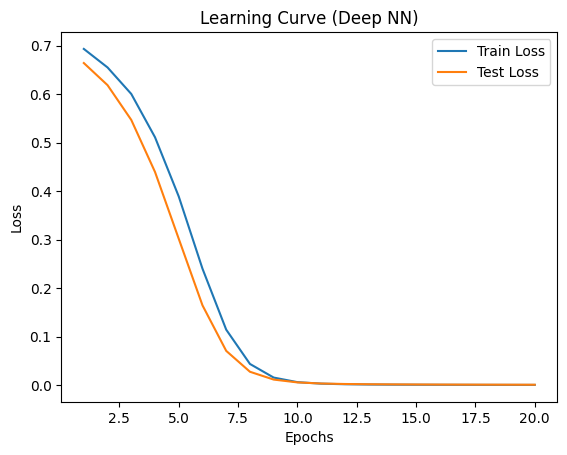

In [10]:

# Нейросеть с тремя скрытыми слоями
class DeepNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_sizes[2], output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Определение гиперпараметров для более сложной модели
hidden_sizes = [128, 64, 32]  # Размеры скрытых слоев
learning_rate = 0.001
num_epochs = 20

# Инициализация модели, функции потерь и оптимизатора
model = DeepNN(input_size, hidden_sizes, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Списки для хранения значений потерь
train_losses = []
test_losses = []

# Обучение модели с тремя скрытыми слоями
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))
    test_losses.append(compute_loss(test_loader))

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

# Построение кривой обучения
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve (Deep NN)")
plt.legend()
plt.show()

# 8. Сравнение метрик моделей

In [11]:
from sklearn.metrics import accuracy_score

# Функция для оценки модели
def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for features, labels in dataloader:
            outputs = model(features)
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return accuracy_score(all_labels, all_preds)

# Сравнение моделей
models = {
    "SimpleNN": SimpleNN(input_size, output_size),
    "HiddenLayerNN": HiddenLayerNN(input_size, hidden_size, output_size),
    "DeepNN": DeepNN(input_size, hidden_sizes, output_size)
}

# Загрузим состояния моделей, если они были сохранены
# Если нет сохраненных моделей, пропустите эти строки
# models["SimpleNN"].load_state_dict(torch.load("simple_nn_model.pth"))
# models["HiddenLayerNN"].load_state_dict(torch.load("hidden_layer_model.pth"))
# models["DeepNN"].load_state_dict(torch.load("deep_nn_model.pth"))

results = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": []
}

# Вычисление Accuracy для каждой модели
for name, model in models.items():
    results["Model"].append(name)
    results["Train Accuracy"].append(evaluate_model(model, train_loader))
    results["Test Accuracy"].append(evaluate_model(model, test_loader))

# Сравнение результатов
import pandas as pd
results_df = pd.DataFrame(results)
print("Сравнение метрик моделей:")
print(results_df)


Сравнение метрик моделей:
           Model  Train Accuracy  Test Accuracy
0       SimpleNN        0.542857       0.500000
1  HiddenLayerNN        0.588571       0.568182
2         DeepNN        0.417143       0.409091
